In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [8]:
df = pd.read_csv('data.csv', parse_dates=['Дата'])

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [10]:
grouped_df = df.groupby('Дата')['Количество'].sum()
print(grouped_df)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


Вывести несколько первых строк сгруппированных данных

In [12]:
sales_by_date = df.groupby('Дата')['Количество'].sum()
sales_by_date_df = sales_by_date.reset_index()
print(sales_by_date_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

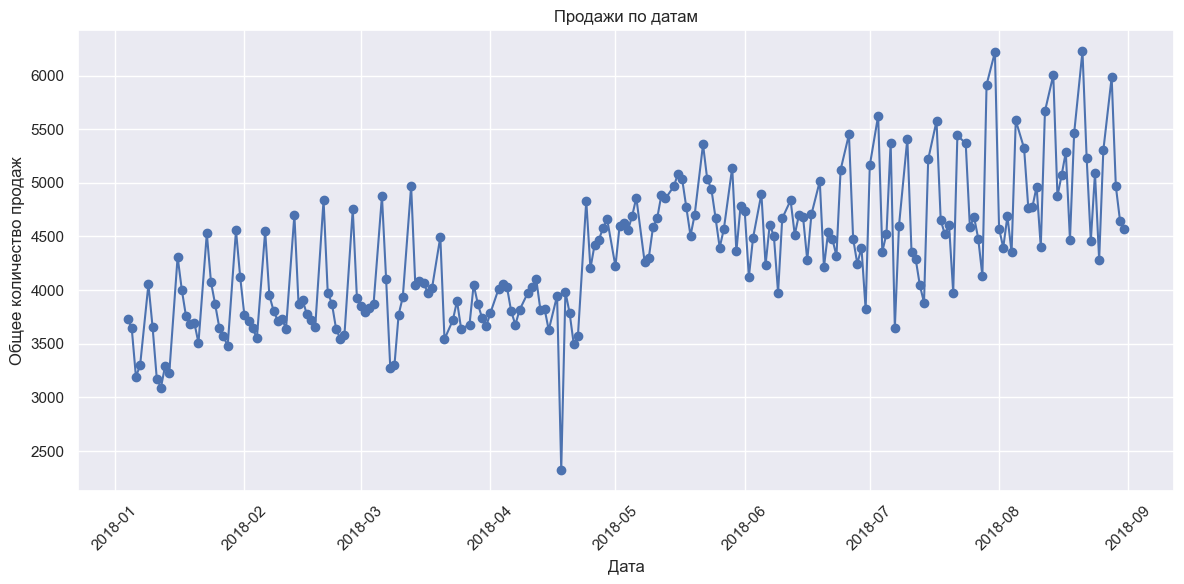

In [18]:

df = pd.read_csv('data.csv', parse_dates=['Дата'])

grouped_df = df.groupby('Дата')['Количество'].sum()


sns.set(style='darkgrid')

plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df.values, marker='o', linestyle='-', color='b')

plt.xlabel('Дата')
plt.ylabel('Общее количество продаж')
plt.title('Продажи по датам')

plt.xticks(rotation=45)


plt.grid(True)

plt.tight_layout()

plt.show()


In [ ]:
Опишите график 

In [ ]:
Ось X (горизонтальная): Данная ось представляет даты. В зависимости от диапазона дат в ваших данных, метки на оси X варьируются  от нескольких дней до нескольких месяцев или даже лет. Метки представлены в формате полной даты (году месяц день) что позволит увидеть точные даты.
Ось Y (вертикальная): Данная  ось показывает общее количество продаж на каждую дату. Значения варьируются в зависимости от объема продаж.
Тип линии: График отображает  данные в виде линии, соединяющей точки, где каждая точка представляет собой дату и соответствующее количество продаж.
Маркер: На графике использованы маркеры (круги) для обозначения значений на каждой дате. Эти маркеры помогают визуально определить, какие значения связаны с какими датами.
Наблюдаются колебания в объемах продаж, которые могут указывать на сезонные тренды, специальные события или другие факторы, влияющие на продажи.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [19]:
max_quantity_index = df['Количество'].idxmax()
max_quantity_row = df.loc[max_quantity_index]

print(max_quantity_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [30]:

df['День недели'] = df['Дата'].dt.dayofweek

filtered_df = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['День недели'] == 2)]

filtered_df = filtered_df[filtered_df['Склад'].isin([1, 2, 3])]

print("Отфильтрованные данные:")
print(filtered_df.head())
print(filtered_df.describe())
print(filtered_df['Склад'].value_counts())
print(filtered_df['Номенклатура'].value_counts())


Отфильтрованные данные:
             Дата  Склад Контрагент Номенклатура  Количество  День недели
190523 2018-06-06      1  address_0    product_0          18            2
190524 2018-06-06      1  address_0    product_1          24            2
190525 2018-06-06      1  address_0    product_2          19            2
190526 2018-06-06      1  address_0    product_3           8            2
190527 2018-06-06      1  address_0    product_4           2            2
              Склад    Количество  День недели
count  12329.000000  12329.000000      12329.0
mean       2.075675      3.050126          2.0
std        0.789614      3.034800          0.0
min        1.000000      0.000000          2.0
25%        1.000000      1.000000          2.0
50%        2.000000      2.000000          2.0
75%        3.000000      4.000000          2.0
max        3.000000     60.000000          2.0
2    4572
3    4345
1    3412
Name: Склад, dtype: int64
product_1     1503
product_2     1482
product_0     1

In [57]:
grouped_df = filtered_df.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()
sorted_df = grouped_df.sort_values(['Склад', 'Количество'], ascending=[True, False])
top_products_df = sorted_df.groupby('Склад').first().reset_index()

print("Топовые товары:")
print(top_products_df)

Топовые товары:
   Склад Номенклатура  Количество
0      1    product_1        2981
1      2    product_1        2887
2      3    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [44]:
pip install --upgrade xlrd

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import os

file_path = 'weather.xlsx'

if os.path.isfile(file_path):
    try:
        
        weather_data = pd.read_excel(file_path, engine='xlrd')
        print(weather_data.head())
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")
else:
    print("Файл не найден. Проверьте путь к файлу.")


        Дата     T
0 2018-08-31   9.6
1 2018-08-31  11.3
2 2018-08-31  12.3
3 2018-08-31  13.2
4 2018-08-31  12.5


float64


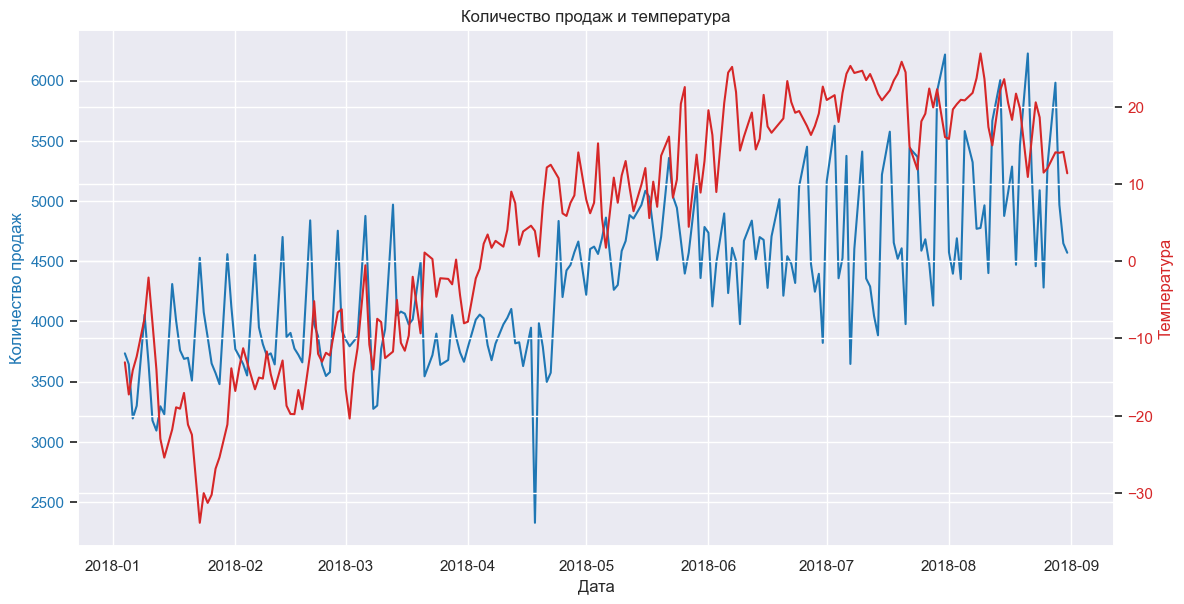

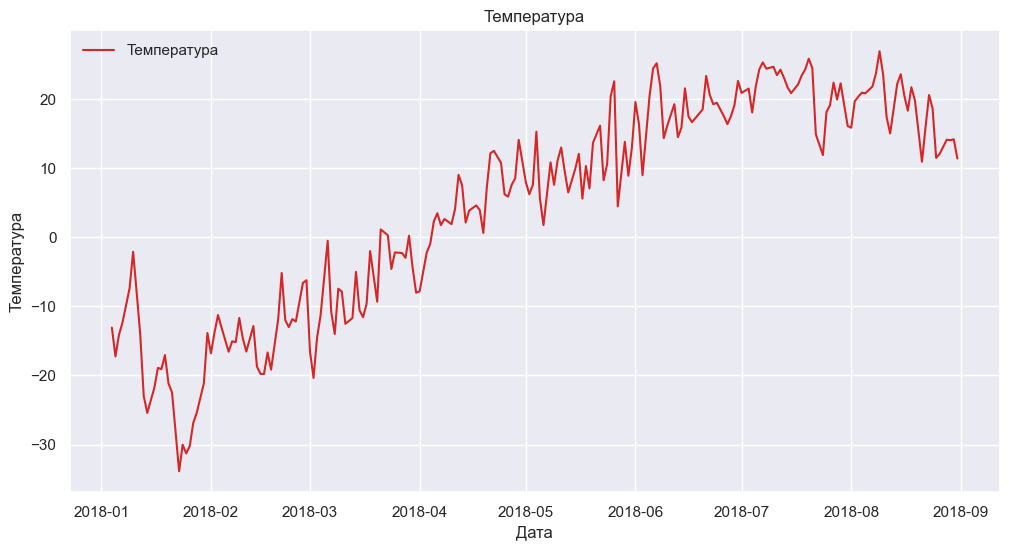

In [64]:

weather_data = pd.read_excel(weather_file_path)
weather_data.columns = ['Date', 'Temperature']
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%d.%m.%Y')

print(weather_data['Temperature'].dtype)  # Должен быть float64

daily_temp = weather_data.groupby('Date').agg({'Temperature': 'mean'}).reset_index()

sales_data = pd.read_csv(sales_file_path)
sales_data['Дата'] = pd.to_datetime(sales_data['Дата'])

daily_sales = sales_data.groupby('Дата').agg({'Количество': 'sum'}).reset_index()

combined_data = pd.merge(daily_sales, daily_temp, left_on='Дата', right_on='Date')


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(combined_data['Дата'], combined_data['Количество'], color='tab:blue', label='Количество продаж')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
ax2.set_ylabel('Температура', color='tab:red')
ax2.plot(combined_data['Дата'], combined_data['Temperature'], color='tab:red', label='Температура')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Количество продаж и температура')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(combined_data['Дата'], combined_data['Temperature'], color='tab:red', label='Температура')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Температура')
plt.legend()
plt.show()
